In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt
from pylab import *
from numpy import*
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [ ]:
init_notebook_mode(connected = True)
cf.go_offline()

#### Обнаружение R-пика ЭКГ

In [ ]:
import neurokit2
_, results = neurokit2.ecg_peaks(ecgsignal, sampling_rate=500)
rpeaks = results["ECG_R_Peaks"]

import sleepecg
rpeaks = sleepecg.detect_heartbeats(ecgsignal, fs=500)

import wfdb.processing
rpeaks = wfdb.processing.xqrs_detect(ecgsignal, fs=500, verbose=False)

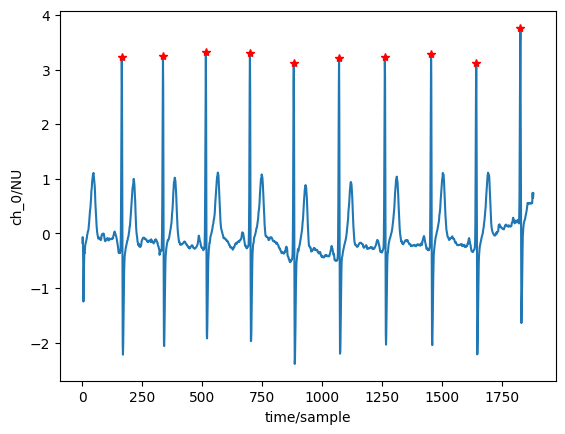

In [ ]:
import wfdb.processing

rpeaks_corrected = wfdb.processing.correct_peaks(
    ecgsignal, rpeaks, search_radius=36, smooth_window_size=50, peak_dir="up"
)
wfdb.plot_items(ecgsignal, [rpeaks_corrected])

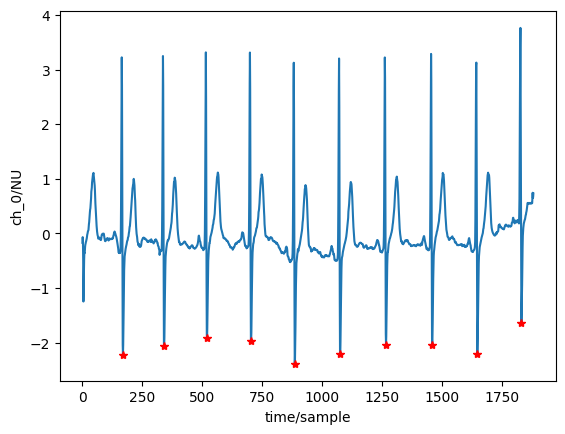

In [ ]:
low_pick = wfdb.processing.correct_peaks(
    ecgsignal, rpeaks, search_radius=36, smooth_window_size=50, peak_dir="down"
)
wfdb.plot_items(ecgsignal, [low_pick])

In [ ]:
print(rpeaks_corrected)

[ 164  336  515  699  882 1071 1262 1455 1644 1828]


In [ ]:
print(low_pick)

[ 169  341  520  703  886 1075 1267 1460 1648 1832]


In [ ]:
len(ecgsignal)

1883

In [ ]:
def get_cycle(arr, peaks):
  signal_split = []
  cycle = []
  peaks = peaks[::-1]
  f = True #флаг конца массива с пиками
  f1 = True #флаг вхождения первого пика
  for i in range(len(arr)):
    if f and i == peaks[-1]:
      if f1:
        f1 = False
        cycle = []
      else:
        signal_split.append(cycle)
        cycle = []
      peaks = peaks[:-1]
      if f and len(peaks) == 0:
        f = False
    cycle.append(arr[i])
  return signal_split

In [ ]:
ecgsignal_split = []
cycle = []

for i in range(len(ecgsignal)):
    if i in rpeaks_corrected:
        if i == rpeaks_corrected[0]:
            cycle = []
        else:
            ecgsignal_split.append(cycle)
            cycle = []
    cycle.append(ecgsignal[i])

In [ ]:
ecg1 = pd.Series(ecgsignal_split[0])
ecg1.iplot()

In [ ]:
def sign(x):
   return 1 if x > 0 else -1

In [ ]:
sp = [[(i[0] - min(i[:10])), len(i), ((i[0] - min(i[:10]))/len(i))] for i in ecgsignal_split]
s = []
for i in range(len(sp) - 1):
    R = sp[i + 1][0] - sp[i][0]
    T = sp[i + 1][1] - sp[i][1]
    L = sp[i + 1][2] - sp[i][2]
    s.append([R, T, L])

In [ ]:
letters_signs = [[1, 1, 1], [-1, -1, 1], [1, -1, 1], [-1, 1, -1], [1, 1, -1], [-1, -1, -1]]
letters = ['A', 'B', 'C', 'D', 'E', 'F']

In [ ]:
def tree(data):
  if data[0] == 1:
    if data[1] == -1:
      return 'C'
    else:
      if data[2] == -1:
        return 'E'
      return 'A'
  else:
    if data[1] == 1:
      return 'D'
    else:
      if data[2] == 1:
        return 'B'
      return 'F'

In [ ]:
s = [[sign(i) for i in k] for k in s]

stroka = ''
for i in s:
    stroka += letters[letters_signs.index(i)]
stroka

'DDCADDCC'